In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\jonas\OneDrive\Github\EBA-3500\site':
  os.chdir(r'C:\Users\jonas\OneDrive\Github\EBA-3500\site')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\jonas\AppData\Local\Temp\ipykernel_21432\3518293376.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\stat.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\_collectio

In [2]:
import pandas as pd
supermarket = pd.read_csv("supermarket_sales.csv")
supermarket.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [3]:
import numpy as np
rng = np.random.default_rng(seed=313)

In [4]:
x = supermarket["gross income"]
n = x.size # equals 1000.
n_reps = 100
boots = rng.choice(x, (n, n_reps))
boots.shape
boots

array([[39.065 , 11.7465,  6.1925, ..., 30.368 , 10.238 , 43.749 ],
       [34.956 , 11.498 , 32.41  , ..., 10.1325,  4.3725,  6.456 ],
       [16.0265, 22.7205,  1.921 , ...,  3.841 ,  6.1155,  3.333 ],
       ...,
       [ 5.679 ,  8.64  , 19.084 , ...,  6.1925,  5.2425,  1.616 ],
       [14.55  ,  7.8785, 18.6095, ...,  7.278 , 10.168 , 26.208 ],
       [27.275 , 22.01  , 10.863 , ...,  2.223 ,  3.47  ,  5.11  ]])

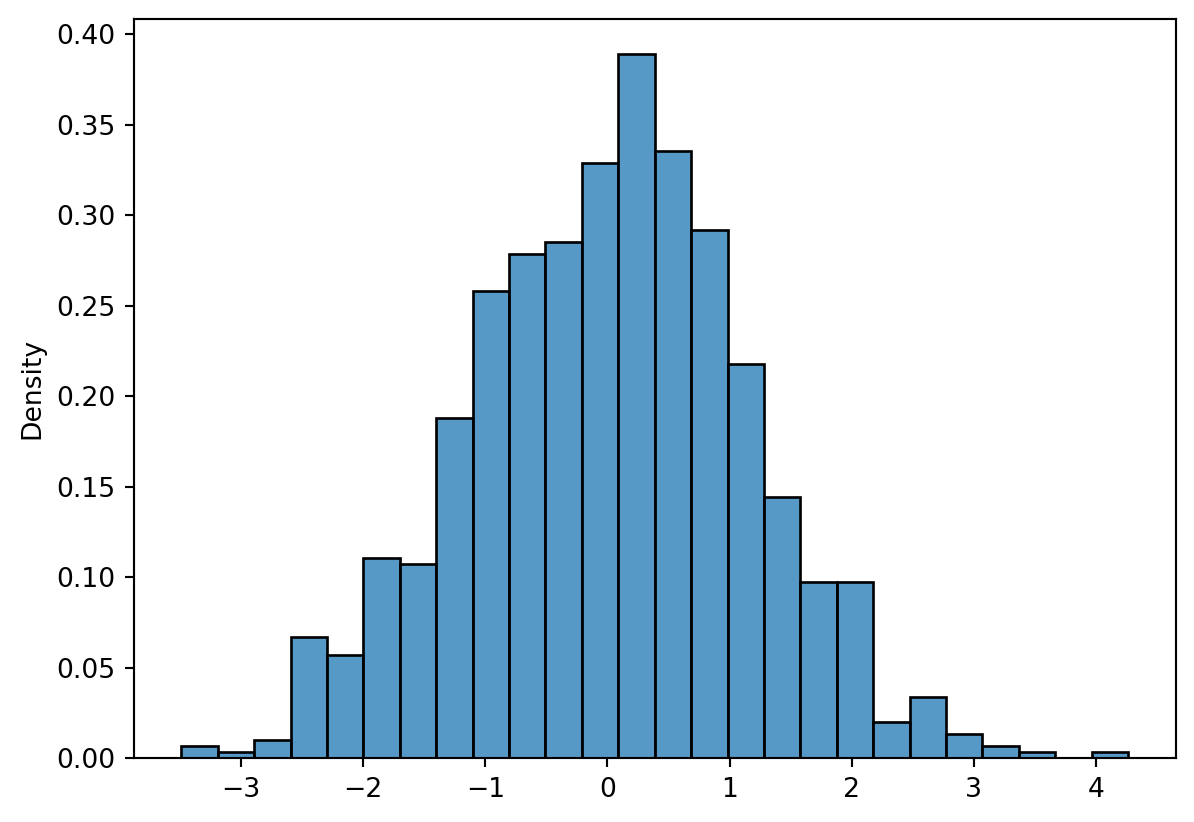

In [5]:
import seaborn as sns
import matplotlib.pylab as plt
means = boots.mean(axis = 1) - x.mean()
sns.histplot(means, stat="density")
plt.show()

In [6]:
means.std()

1.1363259590415926

In [7]:
np.quantile(means, (0.1, 0.9))

array([-1.4862985,  1.404376 ])

In [8]:
np.quantile(means, (0.1, 0.9)) + x.mean()

array([13.8930705, 16.783745 ])